In [1]:
import requests
import json

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx
%matplotlib inline

#from spineq.utils import coverage
from spineq.plotting import plot_coverage_grid

In [2]:
query = "http://uoweb3.ncl.ac.uk/api/v1.1/sensors/json/?theme=Air+Quality&bbox_p1_x=-1.988472&bbox_p1_y=54.784364&bbox_p2_x=-1.224922&bbox_p2_y=55.190148"
response = requests.get(query)
response

<Response [200]>

In [3]:
jresponse = json.loads(response.content)
sensors = jresponse["sensors"]
sensors

[{'Sensor Name': 'PER_AIRMON_MESH1903150',
  'Sensor Centroid Longitude': -1.521943,
  'Ground Height Above Sea Level': 68.9899978638,
  'Sensor Height Above Ground': 2.0,
  'Sensor Centroid Latitude': 55.029411,
  'Location (WKT)': 'POINT (-1.521943 55.029411)',
  'Raw ID': '73384',
  'Broker Name': 'aq_mesh_api',
  'Third Party': False},
 {'Sensor Name': 'PER_AIRMON_MESH1757150',
  'Sensor Centroid Longitude': -1.61731,
  'Ground Height Above Sea Level': 45.3699989319,
  'Sensor Height Above Ground': 2.0,
  'Sensor Centroid Latitude': 54.97226,
  'Location (WKT)': 'POINT (-1.61731 54.97226)',
  'Raw ID': '73086',
  'Broker Name': 'aq_mesh_api',
  'Third Party': False},
 {'Sensor Name': 'PER_AIRMON_MESH1977150',
  'Sensor Centroid Longitude': -1.468363,
  'Ground Height Above Sea Level': 58.0,
  'Sensor Height Above Ground': 2.0,
  'Sensor Centroid Latitude': 55.015287,
  'Location (WKT)': 'POINT (-1.468363 55.015287)',
  'Raw ID': '79214',
  'Broker Name': 'aq_mesh_api',
  'Third Par

In [4]:
df = pd.DataFrame(sensors)
df.head()

Sensor Name  Sensor Centroid Longitude  \
0  PER_AIRMON_MESH1903150                  -1.521943   
1  PER_AIRMON_MESH1757150                  -1.617310   
2  PER_AIRMON_MESH1977150                  -1.468363   
3  PER_AIRMON_MESH1918150                  -1.558721   
4  PER_AIRMON_MESH1758150                  -1.612715   

   Ground Height Above Sea Level  Sensor Height Above Ground  \
0                      68.989998                         2.0   
1                      45.369999                         2.0   
2                      58.000000                         2.0   
3                      39.040001                         2.0   
4                      47.189999                         2.0   

   Sensor Centroid Latitude               Location (WKT) Raw ID  Broker Name  \
0                 55.029411  POINT (-1.521943 55.029411)  73384  aq_mesh_api   
1                 54.972260    POINT (-1.61731 54.97226)  73086  aq_mesh_api   
2                 55.015287  POINT (-1.468363 55.015287)  79214  aq_mesh_api   
3                 54.996494  POINT (-1.558721 54.996494)  79161  aq_mesh_api   
4                 54.975755  POINT (-1.612715 54.975755)  73087  aq_mesh_api   

   Third Party  
0        False  
1        False  
2        False  
3        False  
4        False

In [5]:
gdf = gpd.GeoDataFrame(df,
                       geometry=gpd.points_from_xy(df["Sensor Centroid Longitude"],
                                                   df["Sensor Centroid Latitude"]),
                       crs={'init': 'epsg:4326'})

# Convert to British National Grid CRS (same as ONS data)
gdf = gdf.to_crs({'init': 'epsg:27700'})

# remove duplicate column - available as "geometry"
gdf.drop("Location (WKT)", inplace=True, axis=1)

gdf.head()

/Users/jroberts/opt/anaconda3/envs/spineq-next/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Sensor Name  Sensor Centroid Longitude  \
0  PER_AIRMON_MESH1903150                  -1.521943   
1  PER_AIRMON_MESH1757150                  -1.617310   
2  PER_AIRMON_MESH1977150                  -1.468363   
3  PER_AIRMON_MESH1918150                  -1.558721   
4  PER_AIRMON_MESH1758150                  -1.612715   

   Ground Height Above Sea Level  Sensor Height Above Ground  \
0                      68.989998                         2.0   
1                      45.369999                         2.0   
2                      58.000000                         2.0   
3                      39.040001                         2.0   
4                      47.189999                         2.0   

   Sensor Centroid Latitude Raw ID  Broker Name  Third Party  \
0                 55.029411  73384  aq_mesh_api        False   
1                 54.972260  73086  aq_mesh_api        False   
2                 55.015287  79214  aq_mesh_api        False   
3                 54.996494  79161  aq_mesh_api        False   
4                 54.975755  73087  aq_mesh_api        False   

                        geometry  
0  POINT (430658.013 570645.970)  
1  POINT (424596.567 564248.757)  
2  POINT (434094.875 569098.986)  
3  POINT (428330.161 566967.574)  
4  POINT (424888.580 564639.302)

In [6]:
# Get sensors in Newcastle upon tyne local authority only

# Get Newcastle upon tyne LA geometry
la = gpd.read_file("../data/raw/la")
tyne_la = la[la["lad18nm"] == "Newcastle upon Tyne"].iloc[0]


gdf = gdf[gdf.intersects(tyne_la["geometry"])]

<ipython-input-7-a52a72a37ffc>:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,


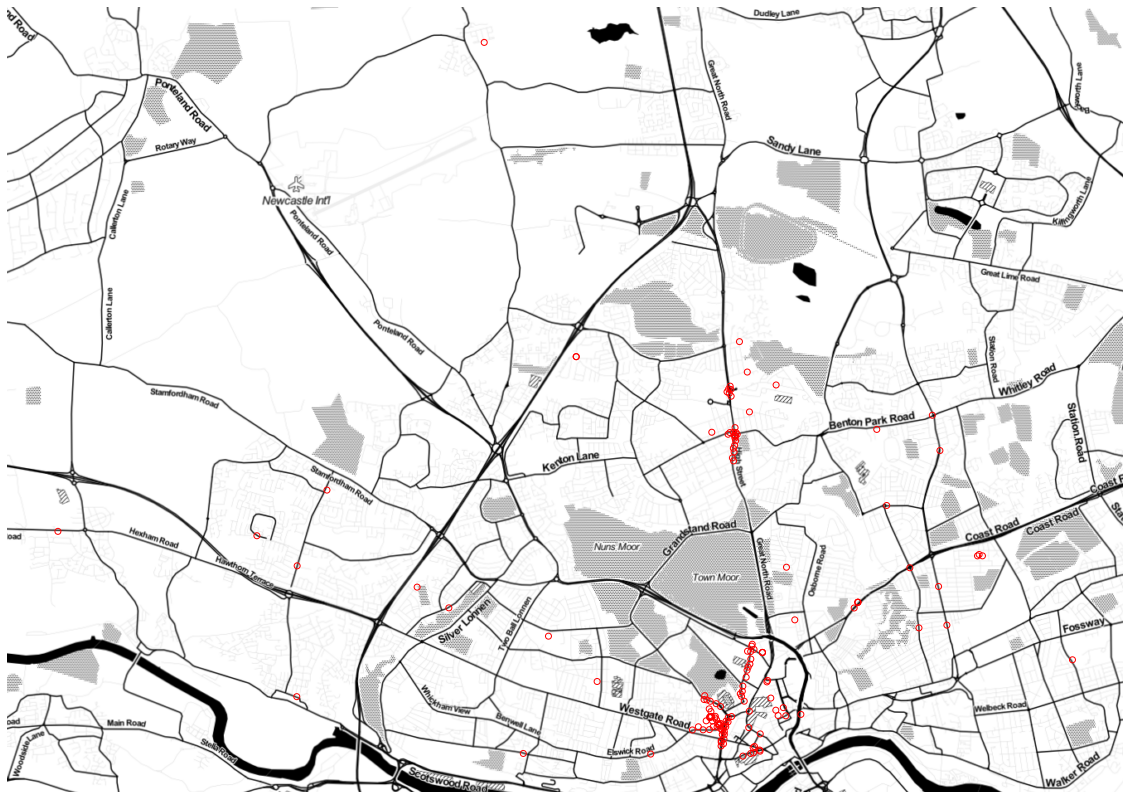

In [7]:
ax = gdf.plot(figsize=(20,20), facecolor='none', edgecolor='red')
ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=gdf.crs)
ax.set_axis_off()
# url="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png"


<ipython-input-8-ba491d2dcdc9>:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,


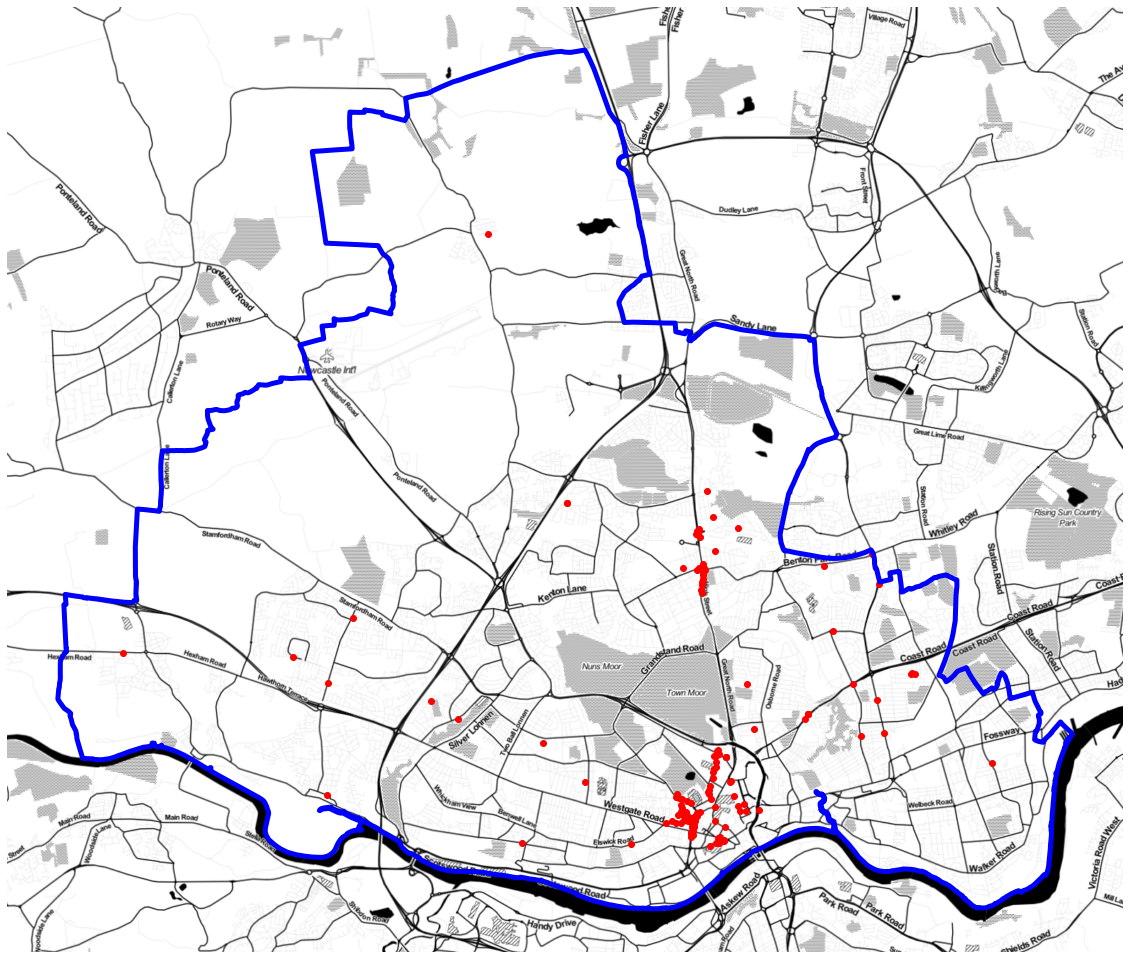

In [8]:
ax = plt.figure(figsize=(20,20)).gca()
x,y = tyne_la["geometry"].exterior.xy
ax.plot(x,y, 'blue', linewidth=5)
gdf.plot(ax=ax, edgecolor='red', facecolor='red')
ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=gdf.crs)
ax.set_axis_off()


In [9]:
df[df[["Sensor Centroid Latitude", "Sensor Centroid Latitude"]].duplicated(keep=False)].sort_values(by="Sensor Centroid Latitude")

Sensor Name  \
7                               PER_AIRMON_MESH1965150   
23                              PER_AIRMON_MESH1963150   
63                                       PER_EMOTE_104   
126                                      PER_EMOTE_102   
17                               PER_AIRMON_MONITOR915   
157                                     PER_EMOTE_1171   
158                                     PER_EMOTE_1173   
140  PER_CITIZEN_CROWD_SOURCED_NEWCASTLE_UNIVERSITY...   
167  PER_CITIZEN_CROWD_SOURCED_NEWCASTLE_UNIVERSITY...   
3                               PER_AIRMON_MESH1918150   
16                              PER_AIRMON_MESH1760150   
60                              PER_AIRMON_MESH1762150   
28                              PER_AIRMON_MESH1968150   
39                              PER_AIRMON_MESH1959150   
47                              PER_AIRMON_MESH1957150   
57                              PER_AIRMON_MESH1917150   

     Sensor Centroid Longitude  Ground Height Above Sea Level  \
7                    -1.603461                      31.170000   
23                   -1.603461                      31.170000   
63                   -1.625151                      64.309998   
126                  -1.625323                      64.300003   
17                   -1.594598                      41.509998   
157                  -1.594598                      41.509998   
158                  -1.594598                      41.509998   
140                  -1.569800                      41.599998   
167                  -1.568770                      40.580002   
3                    -1.558721                      39.040001   
16                   -1.558721                      39.040001   
60                   -1.558721                      39.040001   
28                   -1.558716                      39.040001   
39                   -1.558716                      39.040001   
47                   -1.619875                      62.669998   
57                   -1.619875                      62.669998   

     Sensor Height Above Ground  Sensor Centroid Latitude  \
7                           2.0                 54.965666   
23                          2.0                 54.965666   
63                          2.0                 54.973565   
126                         2.0                 54.973565   
17                          2.0                 54.987092   
157                         2.0                 54.987092   
158                         2.0                 54.987092   
140                         2.0                 54.992524   
167                         2.0                 54.992524   
3                           2.0                 54.996494   
16                          2.0                 54.996494   
60                          2.0                 54.996494   
28                          2.0                 54.996502   
39                          2.0                 54.996502   
47                          2.0                 55.007035   
57                          2.0                 55.007035   

                        Location (WKT) Raw ID               Broker Name  \
7          POINT (-1.603461 54.965666)  79201               aq_mesh_api   
23         POINT (-1.603461 54.965666)  79199               aq_mesh_api   
63        POINT (-1.6251511 54.973565)   1048  Emote Air Quality Sensor   
126        POINT (-1.625323 54.973565)   1046  Emote Air Quality Sensor   
17         POINT (-1.594598 54.987092)   1725               aq_mesh_api   
157        POINT (-1.594598 54.987092)   1609  Emote Air Quality Sensor   
158        POINT (-1.594598 54.987092)   1611  Emote Air Quality Sensor   
140  POINT (-1.569800377 54.992523739)   1616      Citizen Science Kits   
167  POINT (-1.568770409 54.992523739)   1618      Citizen Science Kits   
3          POINT (-1.558721 54.996494)  79161               aq_mesh_api   
16         POINT (-1.558721 54.996494)  73089               aq_mesh_api   
60         P

In [10]:
# Get sensors in Newcastle upon tyne local authority only

# Get Newcastle upon tyne LA geometry
oa = gpd.read_file("../data/processed/tyne_oa")
oa.head()

oa11cd    lad11cd           X           Y  Population  \
0  E00042042  E08000021  421259.393  564639.754         310   
1  E00042043  E08000021  420448.616  564819.213         304   
2  E00042044  E08000021  420509.207  564622.209         246   
3  E00042045  E08000021  421551.722  564088.460         201   
4  E00042046  E08000021  422116.597  563648.529         424   

                                            geometry  
0  POLYGON ((421301.772 564928.429, 421301.755 56...  
1  POLYGON ((420572.364 564892.821, 420572.312 56...  
2  POLYGON ((420492.559 564780.806, 420492.590 56...  
3  POLYGON ((421543.715 563955.116, 421542.251 56...  
4  POLYGON ((422650.214 563568.422, 422650.020 56...

In [11]:
sensors_with_oa = gpd.sjoin(gdf, oa, how="left")
oa_sensor_counts = sensors_with_oa.groupby("oa11cd")["Raw ID"].count().sort_values(ascending=False)
oa_sensor_counts

oa11cd
E00042825    24
E00042580    16
E00042735    10
E00042820     9
E00042822     8
E00175559     6
E00042712     5
E00042826     4
E00042609     4
E00042465     3
E00042579     3
E00042417     3
E00042601     2
E00042397     2
E00175551     2
E00042319     2
E00042378     2
E00042371     2
E00042370     2
E00042400     2
E00175558     1
E00042862     1
E00042768     1
E00175578     1
E00042878     1
E00175585     1
E00042707     1
E00042681     1
E00042652     1
E00042617     1
E00042838     1
E00175587     1
E00042059     1
E00042584     1
E00042537     1
E00042190     1
E00042196     1
E00042197     1
E00042207     1
E00042218     1
E00042257     1
E00042287     1
E00042330     1
E00042337     1
E00042363     1
E00042379     1
E00042395     1
E00042396     1
E00042401     1
E00042415     1
E00042424     1
E00042443     1
E00042449     1
E00042159     1
E00175598     1
Name: Raw ID, dtype: int64

<ipython-input-12-bba84e38a1a4>:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,


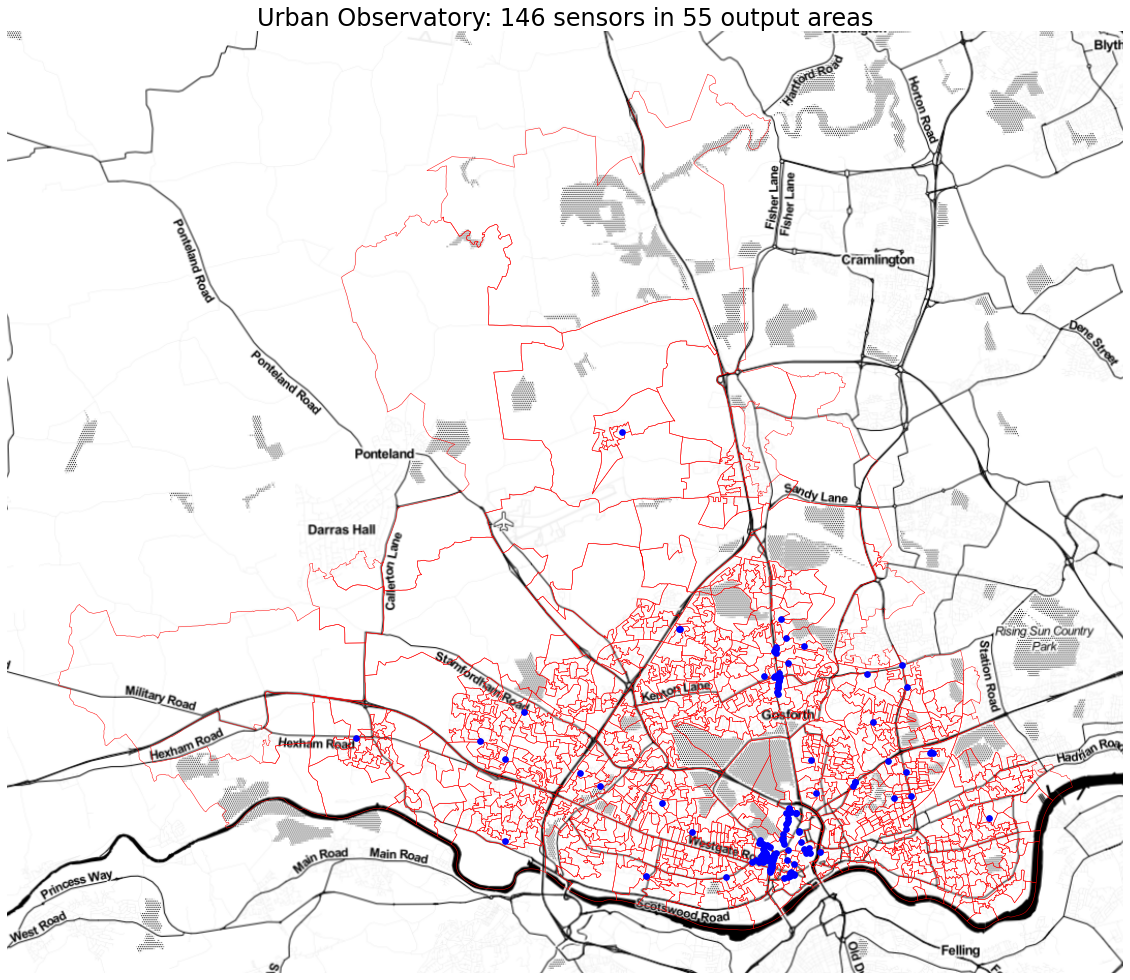

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))

oa.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.5)

ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=oa.crs)

gdf.plot(ax=ax, edgecolor='blue', facecolor='blue', markersize=32, figsize=(20,20))

plt.title("Urban Observatory: {} sensors in {} output areas".format(len(gdf), len(oa_sensor_counts)),
          fontsize=24)

ax.set_axis_off()

#plt.tight_layout()
#plt.savefig("../data/img/uo_sensors.png", dpi=300)

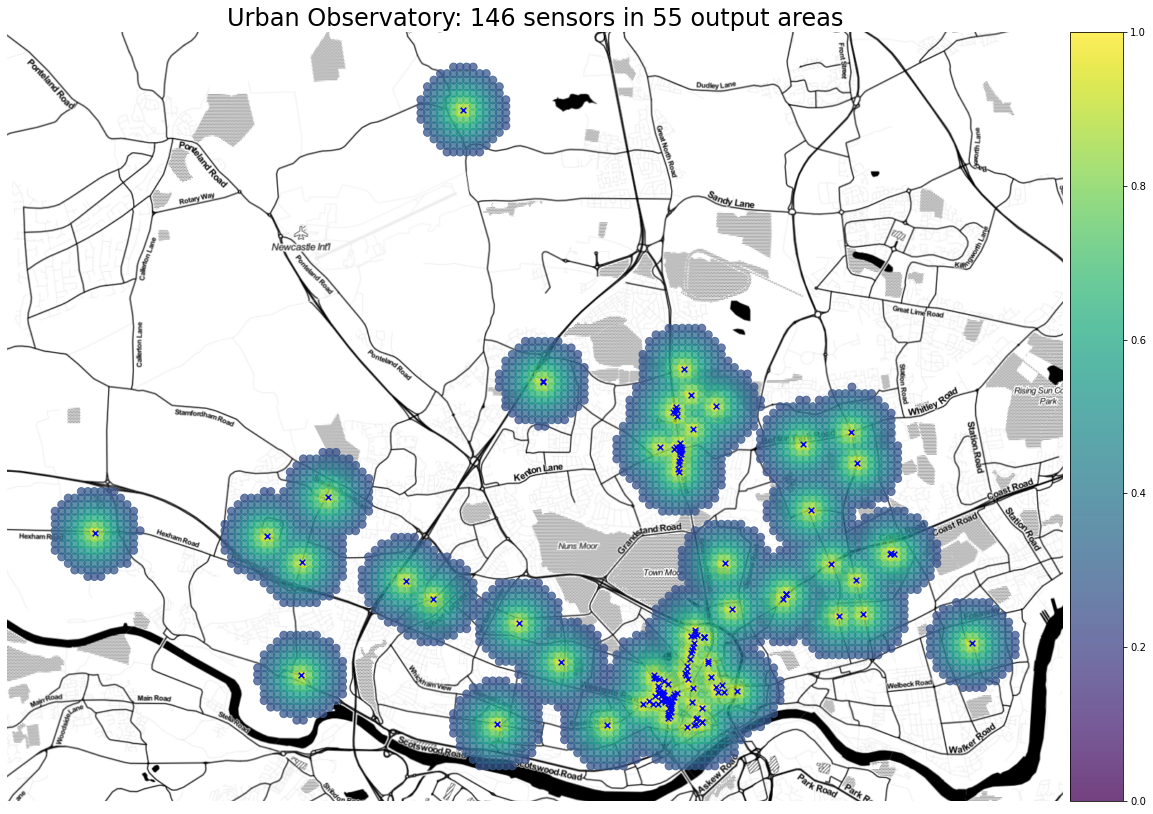

In [14]:
sensors = np.array([gdf["geometry"].x, gdf["geometry"].y]).T
bounds = oa["geometry"].bounds
xlim = (bounds["minx"].min(), bounds["maxx"].max())
ylim =(bounds["miny"].min(), bounds["maxy"].max())
title = "Urban Observatory: {} sensors in {} output areas".format(len(gdf), 
                                                                    len(oa_sensor_counts))
save_path = "../data/img/uo_coverage.png"
fig, ax = plot_coverage_grid(sensors, xlim, ylim, title=title, save_path=save_path)
fig